PetMind is a retailer of products for pets. They are based in the United States.

PetMind sells products that are a mix of luxury items and everyday items. Luxury items include toys. Everyday items include food.

The company wants to increase sales by selling more products for some animals repeatedly.

They have been testing this approach for the last year.

They now want a report on how repeat purchases impact sales.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [5]:
df.shape

(1500, 8)

In [6]:
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

## Data Validation and Cleaning

In [7]:
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [8]:
df['category'] = df['category'].str.replace('-', 'Unknown')

In [9]:
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [10]:
df['size'] = df['size'].str.title()

In [11]:
df['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [15]:
print(df[df['price'] == 'unlisted'])

      product_id   category animal    size     price    sales  rating  \
20            21       Food   Fish  Medium  unlisted   542.06     NaN   
44            45   Medicine   Bird  Medium  unlisted  1209.41     NaN   
46            47       Toys    Cat   Small  unlisted  1367.47     NaN   
70            71  Equipment    Dog   Large  unlisted  1446.43     NaN   
73            74       Food   Bird   Large  unlisted  1864.01     NaN   
...          ...        ...    ...     ...       ...      ...     ...   
1447        1448   Medicine   Fish  Medium  unlisted   456.96     NaN   
1469        1470  Equipment   Fish   Small  unlisted   710.47     NaN   
1471        1472       Toys   Fish   Small  unlisted   976.63     NaN   
1476        1477    Housing   Bird   Large  unlisted  1567.31     NaN   
1483        1484  Equipment    Cat   Small  unlisted  1037.81     NaN   

      repeat_purchase  
20                  0  
44                  0  
46                  1  
70                  0  
73 

In [19]:
df['price'] = df['price'].apply(lambda x: 0 if x == 'unlisted' else x).astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


In [22]:
df['rating'] = df['rating'].fillna(0)

# Exploratory Data Analysis

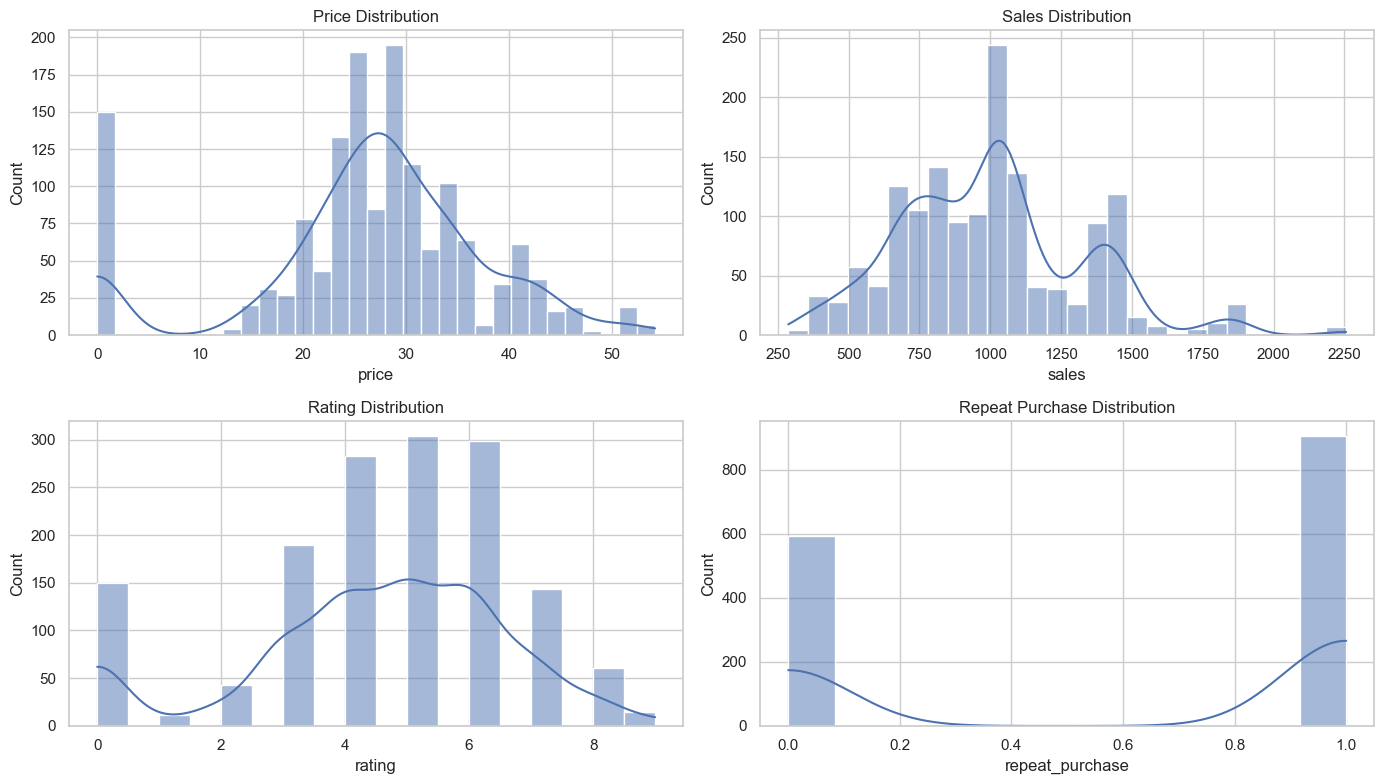


Distribution of Categorical Columns:
category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: count, dtype: int64
animal
Cat     567
Fish    369
Dog     367
Bird    197
Name: count, dtype: int64
size
Small     754
Medium    492
Large     254
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical columns
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['rating'], kde=True)
plt.title('Rating Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['repeat_purchase'], kde=True)
plt.title('Repeat Purchase Distribution')


plt.tight_layout()
plt.show()

# Distribution of categorical columns
print("\nDistribution of Categorical Columns:")
print(df['category'].value_counts())
print(df['animal'].value_counts())
print(df['size'].value_counts())


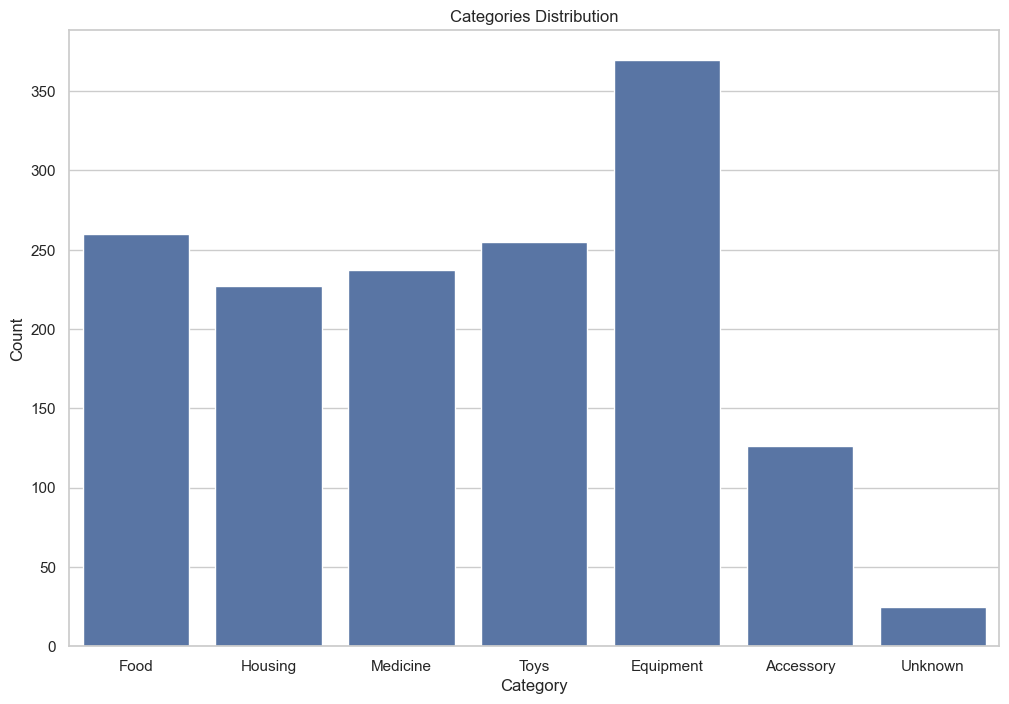

In [37]:

plt.figure(figsize=(12, 8))

# Using seaborn barplot to show the count of each category
sns.countplot(data=df, x='category')

# Setting the title and labels
plt.title('Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

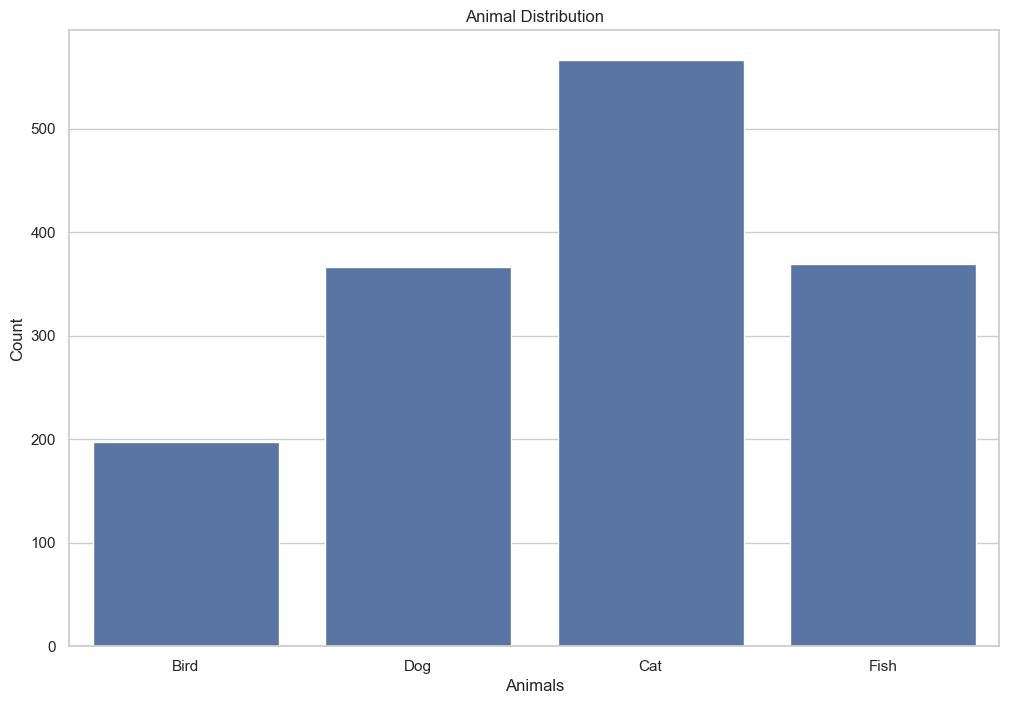

In [38]:

plt.figure(figsize=(12, 8))

# Using seaborn barplot to show the count of each category
sns.countplot(data=df, x='animal')

# Setting the title and labels
plt.title('Animal Distribution')
plt.xlabel('Animals')
plt.ylabel('Count')

plt.show()

## Business Metrics

Showing whether sales are higher for repeat purchases for different animals. I also want to give a range for the sales.


In [24]:
result = df.groupby(['animal', 'repeat_purchase']).agg(
    avg_sales=('sales', lambda x: round(x.mean())),
    min_sales=('sales', lambda x: round(x.min())),
    max_sales=('sales', lambda x: round(x.max()))
).reset_index()

print(result)

  animal  repeat_purchase  avg_sales  min_sales  max_sales
0   Bird                0       1380        858       2255
1   Bird                1       1408        853       2256
2    Cat                0       1035        512       1730
3    Cat                1        998        512       1724
4    Dog                0       1084        574       1795
5    Dog                1       1038        574       1797
6   Fish                0        705        288       1307
7   Fish                1        693        287       1301


In [27]:

# Calculating KPIs
total_sales = df['sales'].sum()
average_price = df['price'].mean()
average_rating = df['rating'].mean(skipna=True)
repeat_purchase_rate = df['repeat_purchase'].mean() * 100

# Creating a table for KPIs
kpi_data = {
    'KPI': ['Total Sales', 'Average Price', 'Average Rating', 'Repeat Purchase Rate'],
    'Value': [total_sales, f'${average_price:.2f}', f'{average_rating:.2f}', f'{repeat_purchase_rate:.2f}%']
}
kpi_df = pd.DataFrame(kpi_data)

print(kpi_df)

                    KPI       Value
0           Total Sales  1494896.77
1         Average Price      $26.48
2        Average Rating        4.49
3  Repeat Purchase Rate      60.40%


In [ ]:
plt.figure(figsize=(12, 8))

